### Import Python Libraries

In [3]:
# =====================================================================
# Title             : Intro_AI_Project.py
# Description       : This program uses Scikit-learn machine learning algorithms in a virtual environment to predict titanic survival on a dataset.
# Author            : Christian Tran (R11641653)
# Date              : 4/1/2024
# Notes             : This program requires compatibility for Python with scikit-learn
# =====================================================================

#Import the needed libraries and packages
import pandas as pd
from sklearn import preprocessing
from sklearn import tree

#Added numpy
import numpy as np

#Adding additional sklearn machine learning algorithms:
#Libraries for graphing 
import seaborn as sns 
import matplotlib.pyplot as plt

#Sklearn machine learning models (2 ML models)
from sklearn.ensemble import RandomForestClassifier #Random forest classifier ML algorithm
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.linear_model import LogisticRegression

#Sklearn data manipulation and calculation packages
from sklearn.metrics import confusion_matrix, classification_report

#Added this line to fix the formatting for graphs in jupyter notebook
%matplotlib inline


### Preprocess the Data, Clean the Data

-- Training data
   PassengerId  Survived  Pclass  Sex        Age     Fare Embarked
0            1         0       3    1  22.000000   7.2500        S
1            2         1       1    0  38.000000  71.2833        C
2            3         1       3    0  26.000000   7.9250        S
3            4         1       1    0  35.000000  53.1000        S
4            5         0       3    1  35.000000   8.0500        S
5            6         0       3    1  29.699118   8.4583        Q
6            7         0       1    1  54.000000  51.8625        S
7            8         0       3    1   2.000000  21.0750        S
8            9         1       3    0  27.000000  11.1333        S
9           10         1       2    0  14.000000  30.0708        C
PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
Fare           float64
Embarked        object
dtype: object



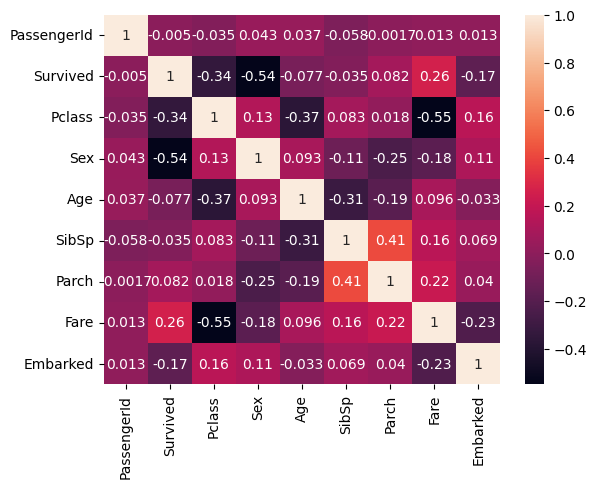

-- After data cleansing
   PassengerId  Survived  Pclass  Sex        Age     Fare Embarked
0            1         0       3    1  22.000000   7.2500        S
1            2         1       1    0  38.000000  71.2833        C
2            3         1       3    0  26.000000   7.9250        S
3            4         1       1    0  35.000000  53.1000        S
4            5         0       3    1  35.000000   8.0500        S
5            6         0       3    1  29.699118   8.4583        Q
6            7         0       1    1  54.000000  51.8625        S
7            8         0       3    1   2.000000  21.0750        S
8            9         1       3    0  27.000000  11.1333        S
9           10         1       2    0  14.000000  30.0708        C



In [13]:
# Load training data

#train_df = pd.read_csv('C:/Users/Christian Tran/Desktop/Intro to AI assignment/Project/pythonCode/train.csv')
train_df = pd.read_csv('train_preformatted.csv') #make sure to change the filepath to whereever the train_preformatted.csv

print ('-- Training data')
print (train_df.head(10))
print (train_df.dtypes)
print ('')

#Correlation between data with a heatmap before cleaning or any other manipulation
#embark coding C = 1, Q = 2, S = 3
#sex coding male = 1, female = 0
train_df_Num = pd.read_csv('train_Numerical.csv') #uses the train_Numerical to filter out the non numerical data
#sns.heatmap(train_df_Num.corr(), cmap = "YlGnBu", annot = True)
sns.heatmap(train_df_Num.corr(), annot = True)
plt.show()

# Data cleansing
mean_age = train_df['Age'].mean()

train_df['Age'] = train_df['Age'].fillna(mean_age)

#train_df['Fare'] = train_df['Fare'].replace(np.nan, 0)

#le = preprocessing.LabelEncoder()
#le = le.fit(train_df['Embarked'])
#train_df['Embarked'] = le.transform(train_df['Embarked'])

print ('-- After data cleansing')
print (train_df.head(10))
print ('')

# Prepare the label

labels = train_df['Survived']

# Prepare the features

#features = train_df[['Age', 'Sex', 'Pclass', 'Embarked', 'Fare']] #Uncomment this if you want the added features

features = train_df[['Age', 'Sex', 'Pclass']] #Original Features

### Decision Tree Classifier Train and Test

-- Model
DecisionTreeClassifier(max_depth=3, random_state=42)

-- Test data after data cleansing
   PassengerId  Pclass     Sex   Age     Fare Embarked
0          892       3    male  34.5   7.8292        Q
1          893       3  female  47.0   7.0000        S
2          894       2    male  62.0   9.6875        Q
3          895       3    male  27.0   8.6625        S
4          896       3  female  22.0  12.2875        S
5          897       3    male  14.0   9.2250        S
6          898       3  female  30.0   7.6292        Q
7          899       2    male  26.0  29.0000        S
8          900       3  female  18.0   7.2292        C
9          901       3    male  21.0  24.1500        S

Test data with predictions
   PassengerId  Pclass  Sex   Age     Fare Embarked  prediction
0          892       3    1  34.5   7.8292        Q           0
1          893       3    0  47.0   7.0000        S           0
2          894       2    1  62.0   9.6875        Q           0
3          895

[Text(0.5, 1.0, 'Predicted Survival for Each Passenger: Decision Tree Classifier')]

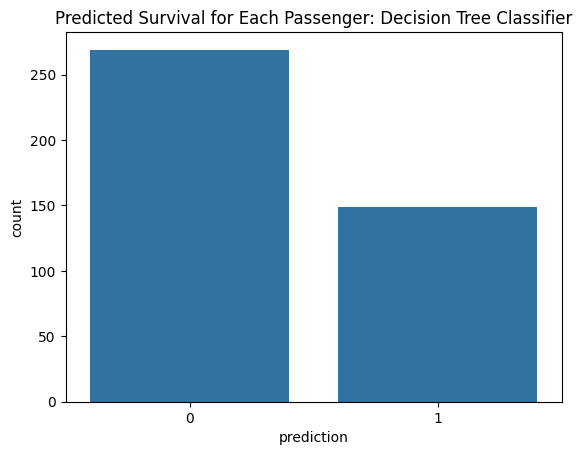

In [14]:
# Train the model
dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42) #Decision tree classifier
model = dt.fit(features, labels)

print ('-- Model')
print (model)
print ('')

# Load test data + data cleansing

test_df = pd.read_csv('test_preformatted.csv')

test_df['Age'] = test_df['Age'].fillna(mean_age)

#test_df['Fare'] = test_df['Fare'].replace(np.nan, 0) #replace any NaN value in Fare column to a 0

#test_df['Embarked'] = le.transform(test_df['Embarked'])

print ('-- Test data after data cleansing')
print (test_df.head(10))
print ('')

# Make predictions
sex_encoder = preprocessing.LabelBinarizer()
sex_encoder = sex_encoder.fit(test_df['Sex'])
test_df['Sex'] = sex_encoder.transform(test_df['Sex'])

#test_features = test_df[['Age', 'Sex', 'Pclass', 'Embarked', 'Fare']] #Uncomment this if you want the added features
test_features = test_df[['Age', 'Sex', 'Pclass']] #Original Features

test_df_results = model.predict(test_features)


test_df['prediction'] = test_df_results

print ('Test data with predictions')
print (test_df.head(10))
print ('')

#generate a graph that shows the predicted values from the previous model above:
#print out graph showcasing the predictions:
sns.barplot(test_df['prediction'].value_counts()).set(title = 'Predicted Survival for Each Passenger: Decision Tree Classifier')

#### Compare Decision Tree Predictions with Expected Results

In [15]:
# Compare predictions with expected results (raw)

expected_results_df = pd.read_csv('gender_submission.csv')

test_df['Survived'] = expected_results_df['Survived']

print ('-- Predictions (raw)')
print (test_df.head(10))
print ('')


# Compare predictions with expected results (aggregates)

true_negatives  = test_df.loc[lambda df: (df.Survived == 0) & (df.prediction == 0), :].shape[0]
true_postives   = test_df.loc[lambda df: (df.Survived == 1) & (df.prediction == 1), :].shape[0]
false_negatives = test_df.loc[lambda df: (df.Survived == 1) & (df.prediction == 0), :].shape[0]
false_postives  = test_df.loc[lambda df: (df.Survived == 0) & (df.prediction == 1), :].shape[0]

print ('-- Prediction (aggregates)')
print ('True negatives: '  + str(true_negatives))
print ('True positives: '  + str(true_postives))
print ('False negatives: ' + str(false_negatives))
print ('False positives: ' + str(false_postives))

#Check how well the model performed with classification report and confusion matrix
print(classification_report(test_df['Survived'], test_df_results)) #test_df represents the expected values I want to compare to our predicted values (rfc_predictions)
print(confusion_matrix(test_df['Survived'], test_df_results)) #confusion matrix shows how many correct and mislabeled survival rates 


-- Predictions (raw)
   PassengerId  Pclass  Sex   Age     Fare Embarked  prediction  Survived
0          892       3    1  34.5   7.8292        Q           0         0
1          893       3    0  47.0   7.0000        S           0         1
2          894       2    1  62.0   9.6875        Q           0         0
3          895       3    1  27.0   8.6625        S           0         0
4          896       3    0  22.0  12.2875        S           1         1
5          897       3    1  14.0   9.2250        S           0         0
6          898       3    0  30.0   7.6292        Q           1         1
7          899       2    1  26.0  29.0000        S           0         0
8          900       3    0  18.0   7.2292        C           1         1
9          901       3    1  21.0  24.1500        S           0         0

-- Prediction (aggregates)
True negatives: 264
True positives: 147
False negatives: 5
False positives: 2
              precision    recall  f1-score   support

    

## Add-On Code for Project : Testing different models

Survived
0    549
1    342
Name: count, dtype: int64


[Text(0.5, 1.0, 'Training Data')]

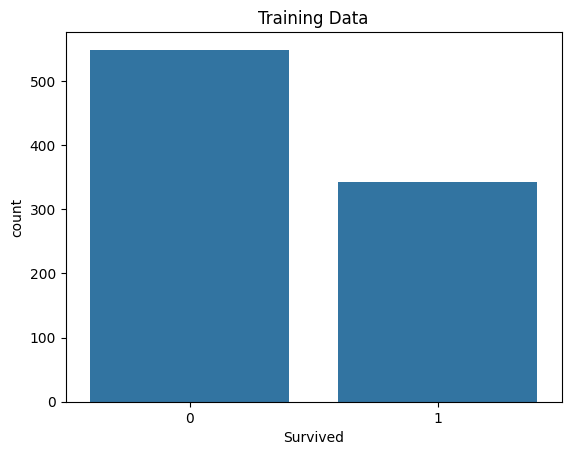

In [19]:
#Start of add-on-code for project: 
#   4/1/2024 - Christian Tran R11641653
#The plan:
#   - Add on at least 2 more predictive machine learning models on this python code 
#   - Add at least 3 (I think...) graphs
#   - Add on accuracy scores for each of the other predictive machine learning models 

#Uses seaborn library to make a basic bargraph on how many survived and how many died in the initial train.csv dataframe
print(train_df['Survived'].value_counts())
sns.barplot(train_df['Survived'].value_counts()).set(title = 'Training Data')

### Logistic Regression

First 20 Predicted Survival: 
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       266
           1       0.94      0.95      0.94       152

    accuracy                           0.96       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.96      0.96      0.96       418

[[256  10]
 [  8 144]]
<class 'numpy.ndarray'>
Zero_count: 
264
One_count: 
154
DUMMY DATA PREDICTION: 
[0]


Text(0.5, 1.0, 'Predicted Survival for Each Passenger: Logistic Regression')

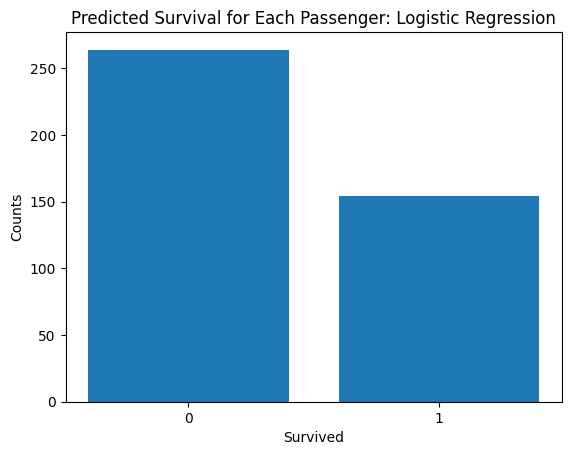

In [16]:
#Training the Logistic Regression model
LR = LogisticRegression()
Logistic_regress = LR.fit(features, labels) #train the rfc model with features (the features to base predictions off of) and labels (the feature we want to predict)

#Predict survival for each passenger 
LR_predictions = LR.predict(test_features) #after training the model, make predictions on the test.csv file using the features from the test.csv file.

#display first 20 predictions from the random forest classifier model
print('First 20 Predicted Survival: ')
print(LR_predictions[:20])

#Check how well the model performed with classification report and confusion matrix
print(classification_report(test_df['Survived'], LR_predictions)) #test_df represents the expected values I want to compare to our predicted values (rfc_predictions)
print(confusion_matrix(test_df['Survived'], LR_predictions)) #confusion matrix shows how many correct and mislabeled survival rates 

print(type(LR_predictions))

#count number of 0's and 1's in rfc_predictions array for bargraph
zero_count = 0
one_count = 0

for values in LR_predictions:
    if (values  == 0):
        zero_count = zero_count + 1
    else:
        one_count = one_count + 1

print('Zero_count: ')
print(zero_count)
print('One_count: ')
print(one_count)

#Test if I can insert new data from code and see if the model will make a prediction:
dummy_data = [[934,2,'Christian Tran','male',23,0,0,612311,50000,float('NaN'),'Q']]

dummy_df = pd.DataFrame(dummy_data, columns=['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'])

dummy_df['Sex'] = sex_encoder.transform(dummy_df['Sex'])

#dummy_df['Embarked'] = le.transform(dummy_df['Embarked'])

#dummy_features = dummy_df[['Age', 'Sex', 'Pclass', 'Embarked', 'Fare']] #Uncomment this if you want the added features

dummy_features = dummy_df[['Age', 'Sex', 'Pclass']] #Original Features

dummy_pred = LR.predict(dummy_features)
print('DUMMY DATA PREDICTION: ')
print(dummy_pred) 

#Create bargraph that shows the predicted 0's and 1's
#Get data ready for graph:
LR_pred_data = {'0': zero_count, '1': one_count}
LR_x_labels = list(LR_pred_data.keys())
LR_values = list(LR_pred_data.values())
#create a bargraph with matplotlib
plt.bar(LR_x_labels, LR_values)
plt.xlabel('Survived')
plt.ylabel('Counts')
plt.title('Predicted Survival for Each Passenger: Logistic Regression')

Graph to show Expected Survivals

[Text(0.5, 1.0, 'Expected Survival for Each Passenger')]

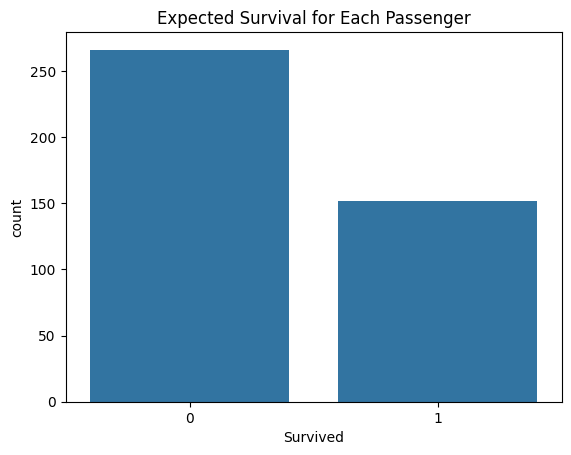

In [17]:
#Create a bargraph that shows the expected 0's and 1's
sns.barplot(test_df['Survived'].value_counts()).set(title = 'Expected Survival for Each Passenger')

### Support Vector Regression Model
 - rbf: radial basis kernal
 - gamma: defines how far the influence a training example reaches
 - C: regularization Parameter 

First 20 Predicted Survival: 
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       266
           1       0.96      0.94      0.95       152

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418

[[260   6]
 [  9 143]]
<class 'numpy.ndarray'>
Zero_count: 
269
One_count: 
149
DUMMY DATA PREDICTION: 
[0]


Text(0.5, 1.0, 'Predicted Survival for Each Passenger: Support Vector Classifier')

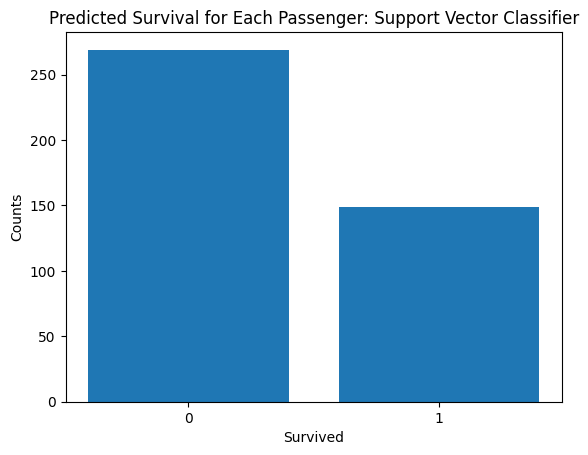

In [18]:
#Training the Support Vector Model using the radial basis kernel
supVectClass = SVC(kernel='rbf', C=5, gamma=0.01)

trained_SVC = supVectClass.fit(features, labels) #train the rfc model with features (the features to base predictions off of) and labels (the feature we want to predict)

#Predict survival for each passenger 
SVC_predictions = supVectClass.predict(test_features) #after training the model, make predictions on the test.csv file using the features from the test.csv file.

#display first 20 predictions from the random forest classifier model
print('First 20 Predicted Survival: ')
print(SVC_predictions[:20])

#Check how well the model performed with classification report and confusion matrix
print(classification_report(test_df['Survived'], SVC_predictions)) #test_df represents the expected values I want to compare to our predicted values (rfc_predictions)
print(confusion_matrix(test_df['Survived'], SVC_predictions)) #confusion matrix shows how many correct and mislabeled survival rates 

print(type(SVC_predictions))

#count number of 0's and 1's in rfc_predictions array for bargraph
zero_count = 0
one_count = 0

for values in SVC_predictions:
    if (values  == 0):
        zero_count = zero_count + 1
    else:
        one_count = one_count + 1

print('Zero_count: ')
print(zero_count)
print('One_count: ')
print(one_count)

#Test if I can insert new data from code and see if the model will make a prediction:
dummy_data = [[934,2,'Christian Tran','male',23,0,0,612311,4.598,float('NaN'),'Q']]

dummy_df = pd.DataFrame(dummy_data, columns=['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'])

dummy_df['Sex'] = sex_encoder.transform(dummy_df['Sex'])

#dummy_df['Embarked'] = le.transform(dummy_df['Embarked'])

#dummy_features = dummy_df[['Age', 'Sex', 'Pclass', 'Embarked', 'Fare']] #Uncomment this if you want the added features

dummy_features = dummy_df[['Age', 'Sex', 'Pclass']] #Original Features

dummy_pred = supVectClass.predict(dummy_features)
print('DUMMY DATA PREDICTION: ')
print(dummy_pred) 

#Create bargraph that shows the predicted 0's and 1's
#Get data ready for graph:
LR_pred_data = {'0': zero_count, '1': one_count}
LR_x_labels = list(LR_pred_data.keys())
LR_values = list(LR_pred_data.values())
#create a bargraph with matplotlib
plt.bar(LR_x_labels, LR_values)
plt.xlabel('Survived')
plt.ylabel('Counts')
plt.title('Predicted Survival for Each Passenger: Support Vector Classifier')